In [39]:
import networkx as nx
import json
import sqlite3
from tqdm import tqdm
import matplotlib.pyplot as plt
import struct
import graph_force

MAPPING_JSON = "graph_mapping.json"

# DB
con = sqlite3.connect("mastodon.db")
cur = con.cursor()


## Read Graph file

In [144]:
mapping = json.load(open(MAPPING_JSON, "r"))
pos = json.load(open("positions_20000.json", "r"))

[('k8s.social', (0.3, 0.6))]

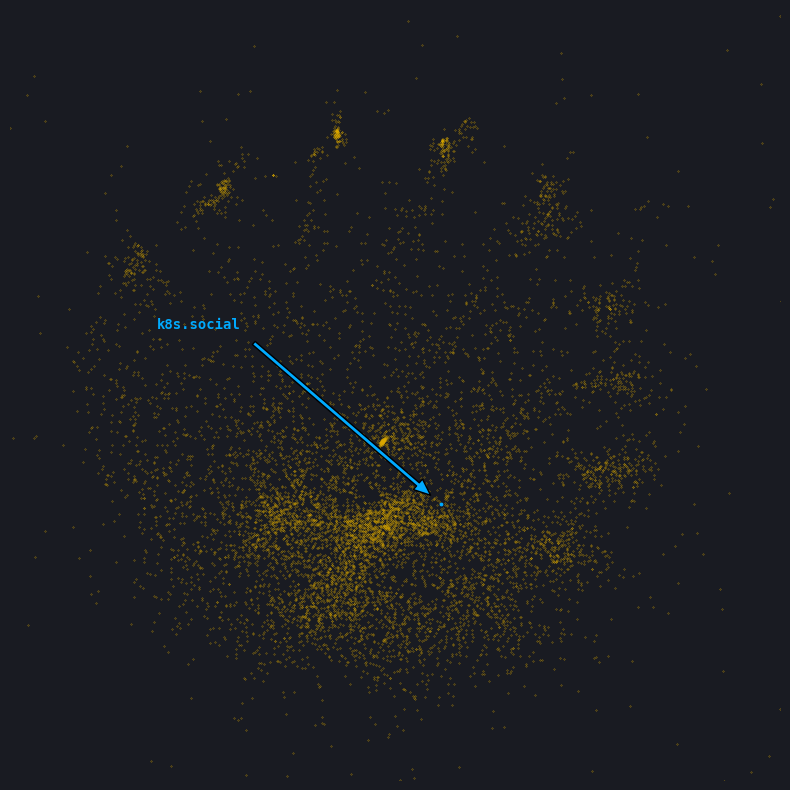

In [157]:
import random

name_mapping = {}
for x in cur.execute("SELECT id, instance FROM instances WHERE not instance like '%glaceon.social'"):
    name_mapping[x[1]] = mapping[str(x[0])]



fig, ax = plt.subplots(figsize=(8,8))

instance_selection = [
    # ("hachyderm.io", (0.3, 0.65)),
    # ("chaos.social", (0.6, 0.6)),
    # ("k8s.social", (0.3,0.6))
]

#choices = 10
#for i in range(10):
#    name = random.choice(list(name_mapping.keys()))
#    x = (0, i / 10)
#    instance_selection.append((name, x))

#ll = []
#for i, name in enumerate(ll):
#    x = (0, i / len(ll))
#    instance_selection.append((name, x))



plt.scatter(*zip(*pos), s=0.05, c="#ddaa00")
ax.set_xlim(-0.02, 0.07)
ax.set_ylim(0.02, 0.12)
fig.set_facecolor('#191b22')
plt.axis('off')
plt.tight_layout()


for name, text_pos in instance_selection:
    instance = pos[name_mapping[name]]
    plt.scatter(instance[0], instance[1], c="#00aaFF", s=3)
    ax.annotate(name, xy=instance,  xycoords='data',
                xytext=text_pos, textcoords='axes fraction',
                arrowprops=dict(facecolor='#00aaFF', shrink=0.05, width=3, headwidth=10),
                horizontalalignment='right', verticalalignment='top',
                color='#00aaFF', fontweight="bold", fontfamily="monospace"
                )
    
instance_selection

In [164]:
name_mapping = {}
for x in cur.execute("SELECT id, instance FROM instances WHERE not instance like '%glaceon.social'"):
    name_mapping[x[1]] = mapping[str(x[0])]
    
d3_data = []
for name, i in name_mapping.items():
    d3_data.append((name, pos[i]))
    
json.dump(d3_data, open("d3_data.json", "w"))